In [1]:
#car ownershi to variables: health, economic status and 

In [1]:
#handle warnings
import warnings
warnings.filterwarnings("ignore")

import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

import pandas as pd            #for DataFrame and analysis
import geopandas as gpd        #for mapping and spatial aggregation

import numpy as np
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sb  

import matplotlib.pyplot as plt  #use matplotlib to modify the plots (e.g. make them larger) 
import palettable.colorbrewer.diverging as pcd

In [2]:
# Import the necessary libraries
import matplotlib as mpl
# Make sure output is into notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import geopandas as gpd
import urllib
import zipfile
import re
import os
from pyproj import CRS
from shapely.geometry import Point # plot
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pysal
import libpysal
from pysal.model import spreg
from spreg import OLS
from libpysal import weights
from pysal.explore import esda
from descartes import PolygonPatch
from libpysal.weights.contiguity import Queen
from pysal.model import mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from numba.core.errors import NumbaDeprecationWarning,NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
warnings.filterwarnings("ignore")


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
#UK CENCUS 2021-2011
my_df = pd.read_csv("data/UKCensus-21-11-London-21geog-data.csv") 
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LSOA21CD          4994 non-null   object 
 1   LSOA21NM          4994 non-null   object 
 2   MSOA21CD          4994 non-null   object 
 3   MSOA21NM          4994 non-null   object 
 4   LAD22CD           4994 non-null   object 
 5   LAD22NM           4994 non-null   object 
 6   LSOA21KM2         4994 non-null   float64
 7   LSOAP21           4994 non-null   float64
 8   CHGIND            4994 non-null   object 
 9   geometry          4994 non-null   object 
 10  TotRes21          4994 non-null   int64  
 11  TotRes11_m21      4994 non-null   int64  
 12  TotHHolds21       4994 non-null   int64  
 13  TotHHolds11_m21   4994 non-null   int64  
 14  FemRes21          4994 non-null   int64  
 15  FemRes11_m21      4994 non-null   int64  
 16  MalRes21          4994 non-null   int64  


In [4]:
#Visualising change- London analysis with barplots 

In [5]:
my_df.columns

Index(['LSOA21CD', 'LSOA21NM', 'MSOA21CD', 'MSOA21NM', 'LAD22CD', 'LAD22NM',
       'LSOA21KM2', 'LSOAP21', 'CHGIND', 'geometry', 'TotRes21',
       'TotRes11_m21', 'TotHHolds21', 'TotHHolds11_m21', 'FemRes21',
       'FemRes11_m21', 'MalRes21', 'MalRes11_m21', 'Asian21', 'Asian11_m21',
       'Black21', 'Black11_m21', 'MixedE21', 'MixedE11_m21', 'White21',
       'White11_m21', 'OtherE21', 'OtherE11_m21', 'CarsZero21',
       'CarsZero11_m21', 'CarsOne21', 'CarsOne11_m21', 'CarsTwo21',
       'CarsTwo11_m21', 'CarsThrp21', 'CarsThrp11_m21', 'EconEm21',
       'EconEm11_m21', 'EconUn21', 'EconUn11_m21', 'EconSt21', 'EconSt11_m21',
       'EconRe21', 'EconRe11_m21', 'EconOt21', 'EconOt11_m21', 'AgeChild21',
       'AgeChild11_m21', 'AgeAdult21', 'AgeAdult11_m21', 'AgeSenior21',
       'AgeSenior11_m21', 'HealthVG21', 'HealthVG11_m21', 'HealthGood21',
       'HealthGood11_m21', 'HealthFair21', 'HealthFair11_m21', 'HealthBad21',
       'HealthBad11_m21', 'HealthVB21', 'HealthVB11_m21', 'Q

In [6]:
#summarising the car ownership 
car_sums = my_df.loc[:,'CarsOne21':'CarsThrp11_m21'].sum()
car_sums

CarsOne21         1380765
CarsOne11_m21     1324034
CarsTwo21          464996
CarsTwo11_m21      458661
CarsThrp21         137830
CarsThrp11_m21      95617
dtype: int64

In [7]:
#reshaping 
car_sums_rs = car_sums.values.reshape(3,2)
car_sums_rs

array([[1380765, 1324034],
       [ 464996,  458661],
       [ 137830,   95617]])

In [8]:
#convert to DataFrame with appropriate labels
car_sums_df=pd.DataFrame(car_sums_rs, index=['One car','Two cars','Three cars'],columns=['2011','2021'])
car_sums_df

2011     2021
One car     1380765  1324034
Two cars     464996   458661
Three cars   137830    95617

<Axes: >

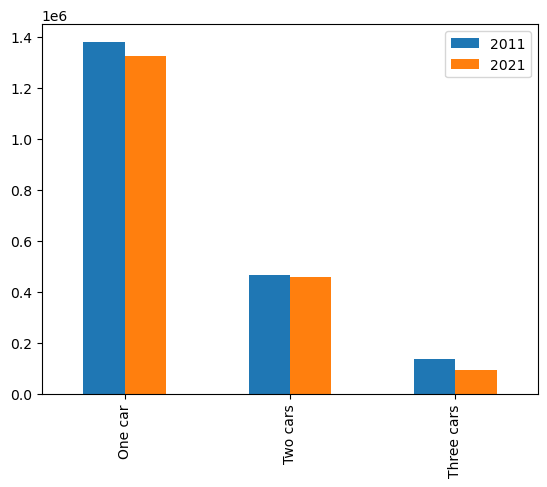

In [9]:
car_sums_df.plot.bar()

In [10]:
#borough level analysis 

In [11]:
#read the lookup table
borabb=pd.read_csv('data/London_Borough_Abbreviations.csv')

In [12]:
#merge
my_df=pd.merge(my_df, borabb, how='left', left_on="LAD22CD", right_on="GSS_CODE")
#check
my_df[['LSOA21CD','LAD22NM','BORO']]

LSOA21CD               LAD22NM BORO
0     E01000001        City of London  CTY
1     E01000002        City of London  CTY
2     E01000003        City of London  CTY
3     E01000005        City of London  CTY
4     E01000006  Barking and Dagenham  BAR
...         ...                   ...  ...
4989  E01035664         Tower Hamlets  TOW
4990  E01035665         Tower Hamlets  TOW
4991  E01035666         Tower Hamlets  TOW
4992  E01035667         Tower Hamlets  TOW
4993  E01035668         Tower Hamlets  TOW

[4994 rows x 3 columns]

In [13]:
my_df.columns

Index(['LSOA21CD', 'LSOA21NM', 'MSOA21CD', 'MSOA21NM', 'LAD22CD', 'LAD22NM',
       'LSOA21KM2', 'LSOAP21', 'CHGIND', 'geometry', 'TotRes21',
       'TotRes11_m21', 'TotHHolds21', 'TotHHolds11_m21', 'FemRes21',
       'FemRes11_m21', 'MalRes21', 'MalRes11_m21', 'Asian21', 'Asian11_m21',
       'Black21', 'Black11_m21', 'MixedE21', 'MixedE11_m21', 'White21',
       'White11_m21', 'OtherE21', 'OtherE11_m21', 'CarsZero21',
       'CarsZero11_m21', 'CarsOne21', 'CarsOne11_m21', 'CarsTwo21',
       'CarsTwo11_m21', 'CarsThrp21', 'CarsThrp11_m21', 'EconEm21',
       'EconEm11_m21', 'EconUn21', 'EconUn11_m21', 'EconSt21', 'EconSt11_m21',
       'EconRe21', 'EconRe11_m21', 'EconOt21', 'EconOt11_m21', 'AgeChild21',
       'AgeChild11_m21', 'AgeAdult21', 'AgeAdult11_m21', 'AgeSenior21',
       'AgeSenior11_m21', 'HealthVG21', 'HealthVG11_m21', 'HealthGood21',
       'HealthGood11_m21', 'HealthFair21', 'HealthFair11_m21', 'HealthBad21',
       'HealthBad11_m21', 'HealthVB21', 'HealthVB11_m21', 'Q

In [14]:
car_df = my_df[['BORO',
                'CarsZero21',
       'CarsZero11_m21', 'CarsOne21', 'CarsOne11_m21', 'CarsTwo21',
       'CarsTwo11_m21', 'CarsThrp21', 'CarsThrp11_m21']]


car_bsums = car_df.groupby('BORO').sum()
car_bsums

CarsZero21  CarsZero11_m21  CarsOne21  CarsOne11_m21  CarsTwo21  \
BORO                                                                    
BAR        70262           66642     100184          90174      40992   
BEX        21319           21918      43216          42054      22658   
BRE        52304           47418      46312          43598      15299   
BRO        31093           30723      62967          59613      30984   
CAM        59033           59595      27979          30991       4815   
CRO        51420           48525      66097          63182      26555   
CTY         3793            3043        955           1100        123   
EAL        49190           43847      58509          54846      20204   
ENF        37506           38933      53621          51872      22358   
GRE        49182           42453      48393          43060      13002   
HAC        68832           65721      32313          31157       4169   
HAM        46677           44524      28746          29496       4936   
HAV        21801           22364      44705          42968      25234   
HGY        55408           52851      39902          38911       8177   
HIL        24350           22715      48046          43942      27126   
HOU        33725           29985      45506          42744      17940   
HRW        22176           19812      39651          37013      21099   
ISL        64541           60485      27718          28507       3608   
KEN        39004           43982      21861          26866       4939   
KIN        16862           15997      31445          30084      13377   
LAM        78133           75214      46514          45077       8263   
LEW        58370           55893      50094          46992      11197   
MER        27008           25644      38842          37557      12579   
NEW        59691           52846      43649          38531       9927   
RED        28519           27696      47170          44548      21060   
RIC        20521           19751      41732          40079      14792   
SOU        78861           70312      43411          41622       7179   
SUT        18775           18303      38680          36110      18794   
TOW        80020           63795      34573          32330       5056   
WAL        43332           40583      43939          40732      12197   
WAN        65760           59143      57727          56409      11705   
WES        62786           66531      26308          31869       4652   

      CarsTwo11_m21  CarsThrp21  CarsThrp11_m21  
BORO                                             
BAR           38254       11389            8067  
BEX           21708        8109            5204  
BRE           14884        4707            3429  
BRO           30909       10788            7072  
CAM            5757         916             912  
CRO           25836        8876            5571  
CTY             173          42              51  
EAL           20017        5741            4093  
ENF           21997        7423            5328  
GRE           12525        3459            2323  
HAC            4129         757             525  
HAM            5661         871             730  
HAV           23831        9535            5910  
HGY            8507        1603            1333  
HIL           25193        9699            6125  
HOU           16985        5797            3941  
HRW           20994        6736            5011  
ISL            3914         635             490  
KEN            6204        1102            1046  
KIN           13740        3946            2861  
LAM            8148        1753            1219  
LEW           10830        2716            1874  
MER           12462        3296            2377  
NEW            8404        2244            1385  
RED           20684        6942            4762  
RIC           16289        3665            2926  
SOU            7173        1379            1033  
SUT           18214        6126            4118  
TOW            4450    

In [15]:
#absolute change in the ownership of one car 
car_bsums['Car_AbsD']=car_bsums['CarsOne21']-car_bsums['CarsOne11_m21']
car_bsums['Car_AbsD'].describe()

count       32.000000
mean      1772.843750
std       2861.730506
min      -5561.000000
25%       1160.500000
50%       1769.000000
75%       2961.750000
max      10010.000000
Name: Car_AbsD, dtype: float64

In [16]:
#relative (percentage change)--- one car 
car_bsums['Car_PerD']=100*car_bsums['Car_AbsD']/car_bsums['CarsOne11_m21'].abs()
car_bsums['Car_PerD'].describe()

count    32.000000
mean      2.852899
std       7.663148
min     -18.629495
25%       2.709045
50%       4.411104
75%       6.743482
max      13.282811
Name: Car_PerD, dtype: float64

In [17]:
# variables for absoltue and relation change in ownership of no and two cars 
car_bsums['CarZero_AbsD']=car_bsums['CarsZero21']-car_bsums['CarsZero11_m21']
car_bsums['CarTwo_AbsD']=car_bsums['CarsTwo21']-car_bsums['CarsTwo11_m21']

car_bsums['CarZero_PerD']=100*car_bsums['CarZero_AbsD']/car_bsums['CarsZero11_m21'].abs()
car_bsums['CarTwo_PerD']=100*car_bsums['CarTwo_AbsD']/car_bsums['CarsTwo11_m21'].abs()

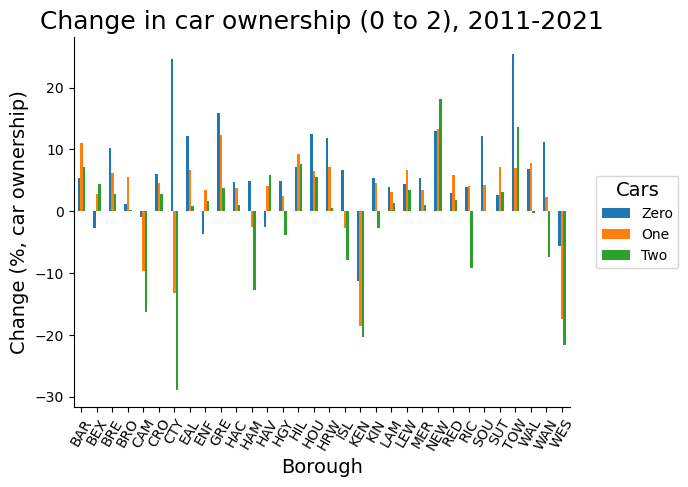

In [18]:
car_bsums[['CarZero_PerD','Car_PerD','CarTwo_PerD']].plot.bar()

#making it look nice
plt.figsize=(6,4)
#for legend options see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='center left', title="Cars", labels=['Zero', 'One', 'Two'],title_fontsize=14,
          bbox_to_anchor=(1.04, 0.5))

plt.xlabel('Borough', fontsize=14)
plt.ylabel('Change (%, car ownership)', fontsize=14)
plt.xticks(rotation=60)
plt.title('Change in car ownership (0 to 2), 2011-2021', fontsize=18)

plt.gca().spines['right'].set_visible(False)     
plt.gca().spines['top'].set_visible(False)

#plt.savefig("img/Barplot_Boroughs_PerDsex_11-21_BySex.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Barplot_Boroughs_PerDsex_11-21_BySex.svg", bbox_inches='tight', facecolor='white')

plt.show()

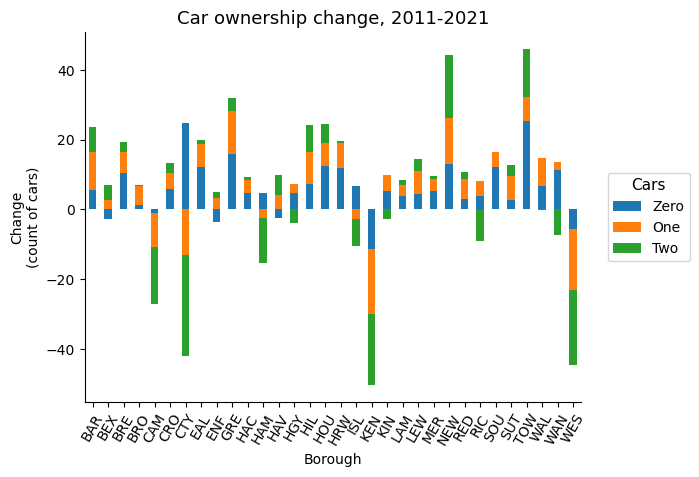

In [19]:
#plotting change - stacked barplot 
car_bsums[['CarZero_PerD','Car_PerD','CarTwo_PerD']].plot.bar(stacked=True)


plt.figsize=(6,4)
plt.legend(loc='center left', title="Cars", labels=['Zero', 'One', 'Two'],title_fontsize=11,
          bbox_to_anchor=(1.04, 0.5))

plt.xlabel('Borough', fontsize=10)
plt.ylabel('Change\n(count of cars)', fontsize=10)
plt.xticks(rotation=60)
plt.title('Car ownership change, 2011-2021', fontsize=13)

plt.gca().spines['right'].set_visible(False)     
plt.gca().spines['top'].set_visible(False)

plt.savefig("data/Barplot_Boroughs_PerDsex_11-21_BySex.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Barplot_Boroughs_PerDsex_11-21_BySex.svg", bbox_inches='tight', facecolor='white')

plt.show()

In [20]:
#mapping change- choropleth maps at borough level 

In [21]:
borshp = pd.read_csv("data/London_Borough_Excluding_MHW.csv")
borshp = gpd.GeoDataFrame(borshp)  #geopandas
borshp['geometry'] = borshp['geometry'].apply(lambda x: loads(x))  #from shapely
borshp = borshp.set_geometry('geometry')

In [22]:
boros = pd.merge(borshp, borabb, how='left', on="GSS_CODE")

In [23]:
boros_age = pd.merge(boros, car_bsums, how='left', on='BORO')

In [24]:
boros_age.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NAME_x          33 non-null     object  
 1   GSS_CODE        33 non-null     object  
 2   HECTARES        33 non-null     float64 
 3   NONLD_AREA      33 non-null     float64 
 4   ONS_INNER       33 non-null     object  
 5   SUB_2009        0 non-null      float64 
 6   SUB_2006        0 non-null      float64 
 7   geometry        33 non-null     geometry
 8   NAME_y          33 non-null     object  
 9   BORO            33 non-null     object  
 10  CarsZero21      33 non-null     int64   
 11  CarsZero11_m21  33 non-null     int64   
 12  CarsOne21       33 non-null     int64   
 13  CarsOne11_m21   33 non-null     int64   
 14  CarsTwo21       33 non-null     int64   
 15  CarsTwo11_m21   33 non-null     int64   
 16  CarsThrp21      33 non-null     int64   
 17  CarsThrp11

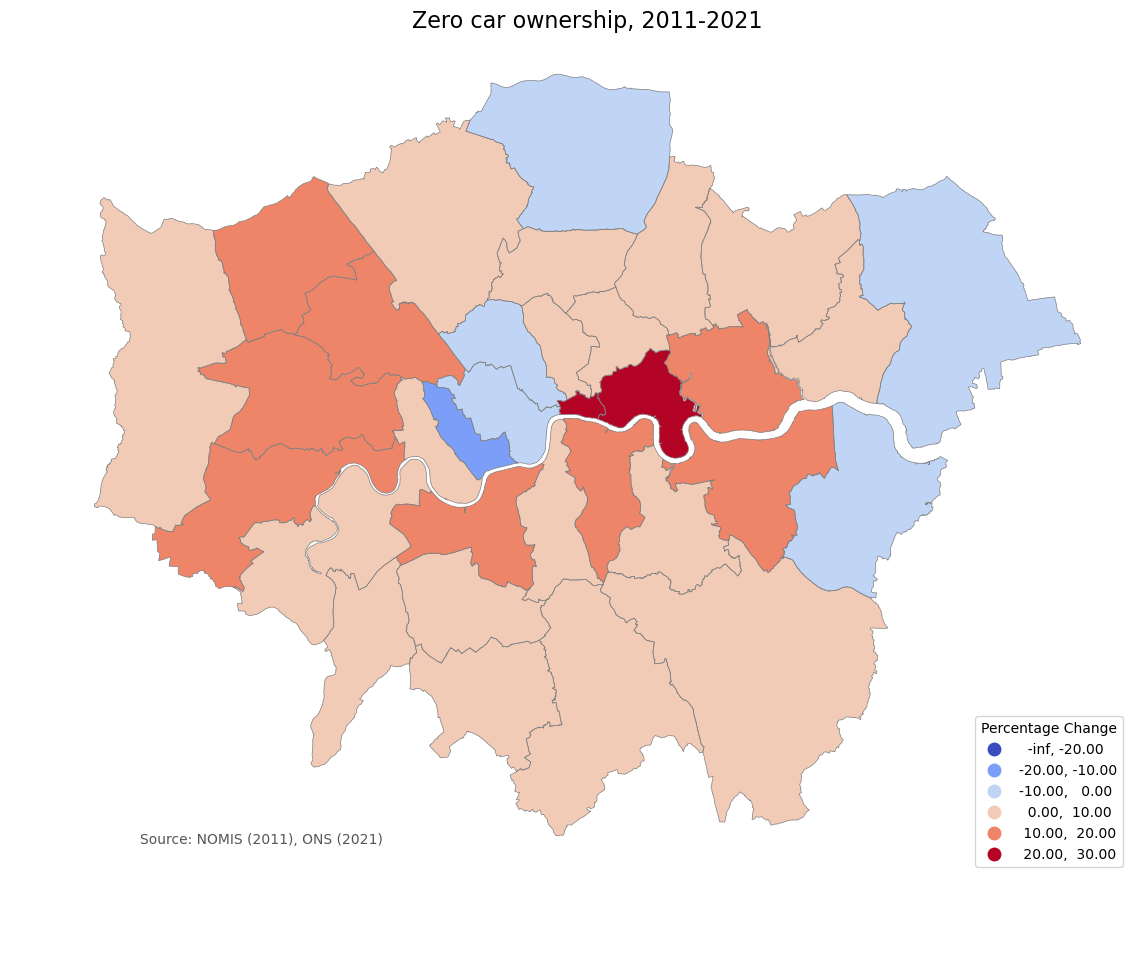

In [25]:
cbins = [x for x in range(-20, 40, 10)]  #from https://stackoverflow.com/a/7267287

fig, ax1 = plt.subplots(1, figsize=(14, 12))   
boros_age.plot(column='CarZero_PerD', ax=ax1,
         scheme='UserDefined', 
         classification_kwds={'bins': cbins},  
         cmap = 'coolwarm',
         edgecolor='grey', linewidth=0.0,        #change line style
         legend=True, legend_kwds={'title': "Percentage Change",'loc': 'lower right'})  

#overlay the borough boundaries
borshp.plot(ax=ax1, facecolor="none", edgecolor="grey", linewidth=0.5)

ax1.axis('off') #don't plot the axes (bounding box)

plt.title('Zero car ownership, 2011-2021', fontsize=16)  #provide a title

ax1.annotate('Source: NOMIS (2011), ONS (2021)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=10, color='#555555')  #add source info on the image itself

#plt.savefig("img/Map_LSOAs_PerD_11-21.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Map_LSOAs_PerD_11-21.svg", bbox_inches='tight', facecolor='white')

plt.show()

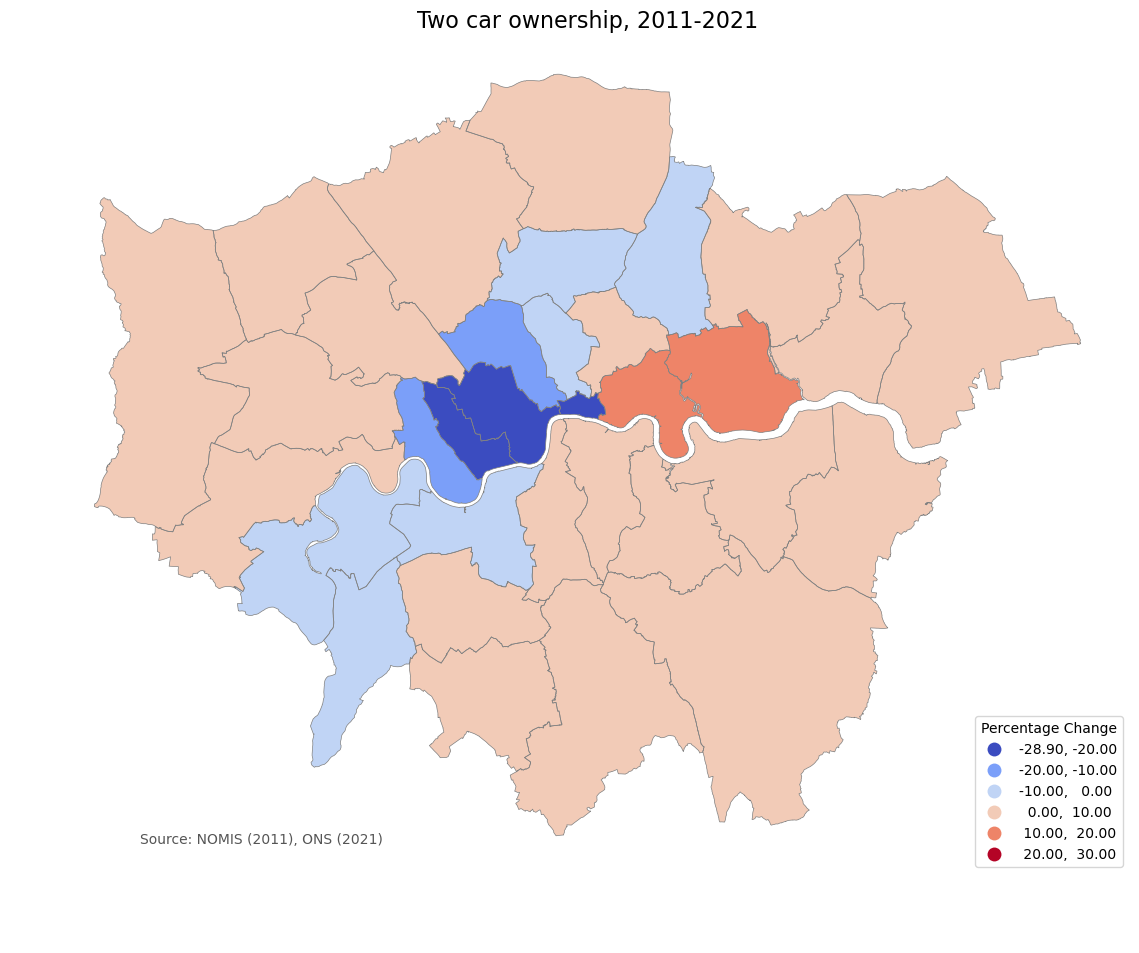

In [26]:
cbins = [x for x in range(-20, 40, 10)]  #from https://stackoverflow.com/a/7267287

fig, ax1 = plt.subplots(1, figsize=(14, 12))   
boros_age.plot(column='CarTwo_PerD', ax=ax1,
         scheme='UserDefined', 
         classification_kwds={'bins': cbins},  
         cmap = 'coolwarm',
         edgecolor='grey', linewidth=0.0,        #change line style
         legend=True, legend_kwds={'title': "Percentage Change",'loc': 'lower right'})  

#overlay the borough boundaries
borshp.plot(ax=ax1, facecolor="none", edgecolor="grey", linewidth=0.5)

ax1.axis('off') #don't plot the axes (bounding box)

plt.title('Two car ownership, 2011-2021', fontsize=16)  #provide a title

ax1.annotate('Source: NOMIS (2011), ONS (2021)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=10, color='#555555')  #add source info on the image itself

#plt.savefig("img/Map_LSOAs_PerD_11-21.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Map_LSOAs_PerD_11-21.svg", bbox_inches='tight', facecolor='white')

plt.show()

In [27]:
#modelling change 
#investigation the relationships between the different variables in the data 

In [28]:
lsoa_gdf = gpd.GeoDataFrame(my_df)  #geopandas
lsoa_gdf['geometry'] = lsoa_gdf['geometry'].apply(lambda x: loads(x))  #from shapely
lsoa_gdf = lsoa_gdf.set_geometry('geometry')

In [29]:
#car one
lsoa_gdf['CarOne_AbsD']=lsoa_gdf['CarsOne21']-lsoa_gdf['CarsOne11_m21']
lsoa_gdf['CarOne_PerD']=100*lsoa_gdf['CarOne_AbsD']/lsoa_gdf['CarsOne11_m21'].abs()

In [30]:
lsoa_gdf[lsoa_gdf['CHGIND']=='S']=None

In [31]:
lsoa_gdf['geometry']=my_df['geometry']
lsoa_gdf['geometry'] = lsoa_gdf['geometry'].apply(lambda x: loads(x))  #from shapely
lsoa_gdf = lsoa_gdf.set_geometry('geometry')

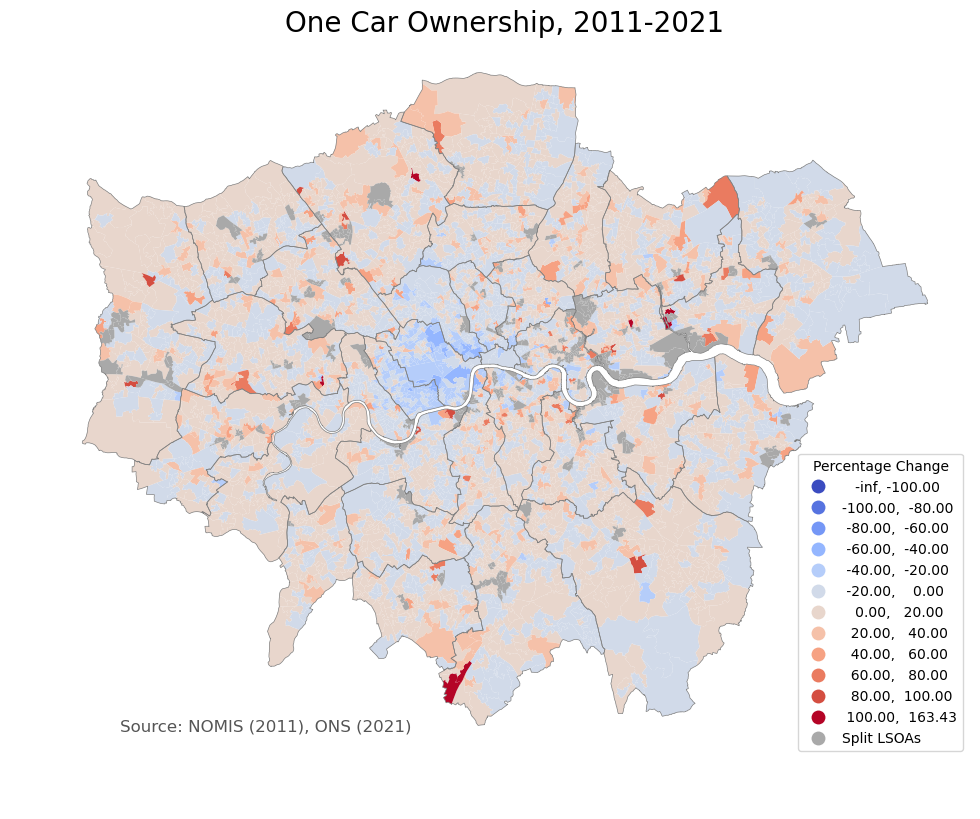

In [32]:
#code to make LSOAs with splits grey
cbins = [x for x in range(-100, 120, 20)]  #from https://stackoverflow.com/a/7267287
fig, ax1 = plt.subplots(1, figsize=(12, 10))  

lsoa_gdf.plot(column='CarOne_PerD', ax=ax1,
             scheme='UserDefined',
             classification_kwds={'bins': cbins},
             cmap = 'coolwarm',
             edgecolor='grey', linewidth=0.0,        
             legend=True, 
             legend_kwds={
                 'title': "Percentage Change",
                 'loc': 'lower right'},
             missing_kwds={
                 "color": "darkgrey",
                 "label": "Split LSOAs"})  

borshp.plot(ax=ax1, facecolor="none", edgecolor="grey", linewidth=0.5)

ax1.axis('off') #don't plot the axes (bounding box)
plt.title('One Car Ownership, 2011-2021', fontsize=20)  #provide a title

ax1.annotate('Source: NOMIS (2011), ONS (2021)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555') 

plt.savefig("data/Map_LSOAs_PerD_11-21_noSplits.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Map_LSOAs_PerD_11-21_noSplits.svg", bbox_inches='tight', facecolor='white')

plt.show()

In [33]:
# plotting the split lsoas 

In [34]:
lsoa_gdf['geometry']=my_df['geometry']
lsoa_gdf['geometry'] = lsoa_gdf['geometry'].apply(lambda x: loads(x))  #from shapely
lsoa_gdf = lsoa_gdf.set_geometry('geometry')

In [35]:
lsoa_gdf.head()

LSOA21CD                   LSOA21NM   MSOA21CD                  MSOA21NM  \
0  E01000001        City of London 001A  E02000001        City of London 001   
1  E01000002        City of London 001B  E02000001        City of London 001   
2  E01000003        City of London 001C  E02000001        City of London 001   
3  E01000005        City of London 001E  E02000001        City of London 001   
4  E01000006  Barking and Dagenham 016A  E02000017  Barking and Dagenham 016   

     LAD22CD               LAD22NM  LSOA21KM2  LSOAP21 CHGIND  \
0  E09000001        City of London    0.12987      1.0      U   
1  E09000001        City of London    0.22842      1.0      U   
2  E09000001        City of London    0.05905      1.0      U   
3  E09000001        City of London    0.18958      1.0      U   
4  E09000002  Barking and Dagenham    0.14654      1.0      U   

                                            geometry  ...  QualSch11_m21  \
0  POLYGON ((532105.312 182010.574, 532162.491 18...  ...          211.0   
1  POLYGON ((532634.497 181926.016, 532619.141 18...  ...          208.0   
2  POLYGON ((532135.138 182198.131, 532158.250 18...  ...          304.0   
3  POLYGON ((533808.018 180767.774, 533649.037 18...  ...          244.0   
4  POLYGON ((545122.049 184314.931, 545271.849 18...  ...          459.0   

   QualUni21  QualUni11_m21  QualOt21  QualOt11_m21                  NAME  \
0     1127.0         1047.0      16.0          67.0        City of London   
1     1086.0         1024.0      18.0          31.0        City of London   
2     1055.0          706.0      35.0          71.0        City of London   
3      387.0          283.0      30.0          94.0        City of London   
4      501.0          431.0      66.0         181.0  Barking and Dagenham   

    GSS_CODE  BORO  CarOne_AbsD  CarOne_PerD  
0  E09000001   CTY        -42.0   -14.736842  
1  E09000001   CTY        -85.0   -29.010239  
2  E09000001   CTY         21.0    14.189189  
3  E09000001   CTY         -8.0    -8.000000  
4  E09000002   BAR          2.0     0.803213  

[5 rows x 75 columns]

In [36]:
#car one
lsoa_gdf['CarTwo_AbsD']=lsoa_gdf['CarsTwo21']-lsoa_gdf['CarsTwo11_m21']
lsoa_gdf['CarTwo_PerD']=100*lsoa_gdf['CarTwo_AbsD']/lsoa_gdf['CarsTwo11_m21'].abs()

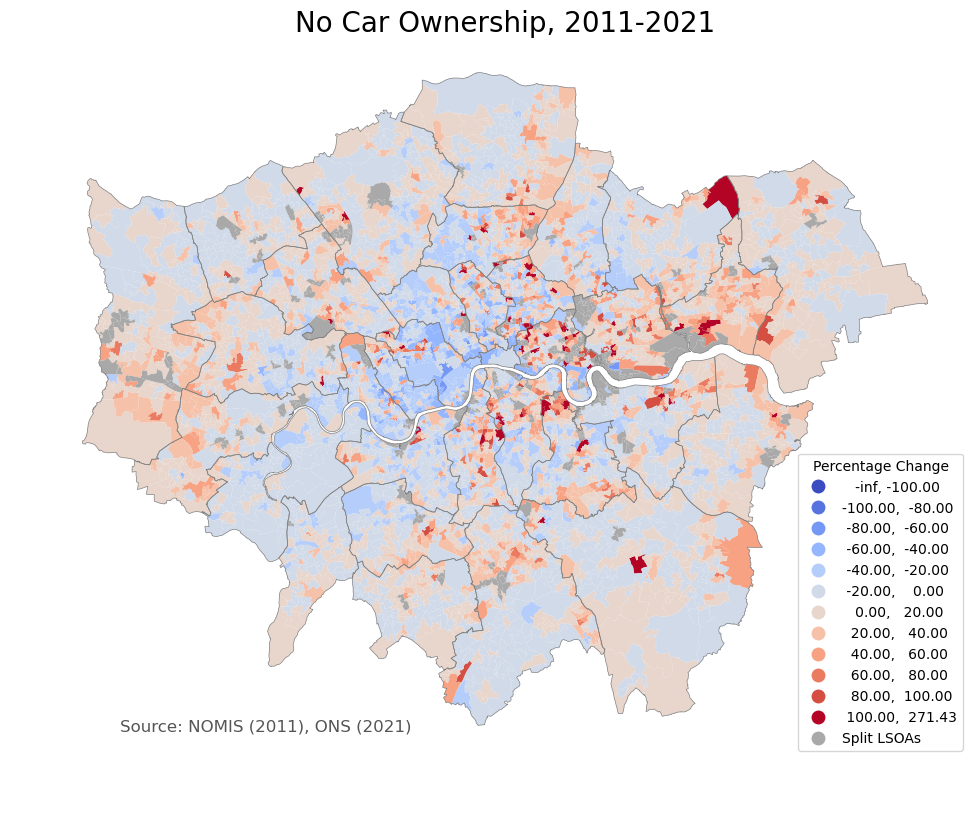

In [37]:
#code to make LSOAs with splits grey
cbins = [x for x in range(-100, 120, 20)]  #from https://stackoverflow.com/a/7267287
fig, ax1 = plt.subplots(1, figsize=(12, 10))  

#gdemdat[gdemdat['CHGIND']!='S'].plot(column='TotRes_PerD', ax=ax1,
lsoa_gdf.plot(column='CarTwo_PerD', ax=ax1,
             scheme='UserDefined',
             classification_kwds={'bins': cbins},  #Keyword arguments to pass to mapclassify
             cmap = 'coolwarm',
             edgecolor='grey', linewidth=0.0,        #change line style
             legend=True, 
             legend_kwds={
                 'title': "Percentage Change",
                 'loc': 'lower right'},
             missing_kwds={
                 "color": "darkgrey",
                 "label": "Split LSOAs"})  

#overlay the borough boundaries
borshp.plot(ax=ax1, facecolor="none", edgecolor="grey", linewidth=0.5)

ax1.axis('off') #don't plot the axes (bounding box)
plt.title('No Car Ownership, 2011-2021', fontsize=20)  #provide a title

ax1.annotate('Source: NOMIS (2011), ONS (2021)',
             xy=(0.1, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')  #add source info on the image itself

plt.savefig("data/Map_LSOAs_PerD_11-21_noSplits.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Map_LSOAs_PerD_11-21_noSplits.svg", bbox_inches='tight', facecolor='white')

plt.show()

In [38]:
#PM 2.5 DATA FOR THE YEARS 2013 AND 2019
pm13= pd.read_csv('data/lsoa21-2013-PM25.csv')
pm19= pd.read_csv('data/lsoa21-2019-PM25.csv')

In [39]:
#merge PM data 
pm = pd.merge(pm13, pm19, on='LSOA21CD')

In [40]:
#N02 DATA FOR THE YEARS 2013 AND 2019
no13 =pd.read_csv('data/lsoa21-2013-NO2.csv')
no19 =pd.read_csv('data/lsoa21-2019-NO2.csv')

In [41]:
#NO data merge
no = pd.merge(no13, no19, on='LSOA21CD')

In [42]:
#merging both air qualities data
pmno= pd.merge(no,pm ,left_on='LSOA21CD', right_on='LSOA21CD')

In [43]:
lsoa_gdf = pd.merge(lsoa_gdf, pmno, left_on='LSOA21CD', right_on='LSOA21CD')

In [44]:
lsoa_gdf.info

<bound method DataFrame.info of        LSOA21CD                     LSOA21NM   MSOA21CD  \
0     E01000001          City of London 001A  E02000001   
1     E01000002          City of London 001B  E02000001   
2     E01000003          City of London 001C  E02000001   
3     E01000005          City of London 001E  E02000001   
4     E01000006    Barking and Dagenham 016A  E02000017   
...         ...                          ...        ...   
4676  E01035721             Westminster 023H  E02000982   
4677  E01035722             Westminster 024G  E02000983   
4678  E01035713  Kensington and Chelsea 016F  E02000592   
4679  E01035650                 Hackney 031C  E02007109   
4680  E01035664           Tower Hamlets 006E  E02000869   

                        MSOA21NM    LAD22CD                 LAD22NM  \
0             City of London 001  E09000001          City of London   
1             City of London 001  E09000001          City of London   
2             City of London 001  E09000001   

In [45]:
lsoa_gdf.columns

Index(['LSOA21CD', 'LSOA21NM', 'MSOA21CD', 'MSOA21NM', 'LAD22CD', 'LAD22NM',
       'LSOA21KM2', 'LSOAP21', 'CHGIND', 'geometry', 'TotRes21',
       'TotRes11_m21', 'TotHHolds21', 'TotHHolds11_m21', 'FemRes21',
       'FemRes11_m21', 'MalRes21', 'MalRes11_m21', 'Asian21', 'Asian11_m21',
       'Black21', 'Black11_m21', 'MixedE21', 'MixedE11_m21', 'White21',
       'White11_m21', 'OtherE21', 'OtherE11_m21', 'CarsZero21',
       'CarsZero11_m21', 'CarsOne21', 'CarsOne11_m21', 'CarsTwo21',
       'CarsTwo11_m21', 'CarsThrp21', 'CarsThrp11_m21', 'EconEm21',
       'EconEm11_m21', 'EconUn21', 'EconUn11_m21', 'EconSt21', 'EconSt11_m21',
       'EconRe21', 'EconRe11_m21', 'EconOt21', 'EconOt11_m21', 'AgeChild21',
       'AgeChild11_m21', 'AgeAdult21', 'AgeAdult11_m21', 'AgeSenior21',
       'AgeSenior11_m21', 'HealthVG21', 'HealthVG11_m21', 'HealthGood21',
       'HealthGood11_m21', 'HealthFair21', 'HealthFair11_m21', 'HealthBad21',
       'HealthBad11_m21', 'HealthVB21', 'HealthVB11_m21', 'Q

In [46]:
lsoa_gdf.describe()

LSOA21KM2      LSOAP21     TotRes21  TotRes11_m21  TotHHolds21  \
count  4681.000000  4681.000000  4681.000000   4681.000000  4681.000000   
mean      0.323593     1.004700  1774.857295   1685.872036   688.656697   
std       0.633758     0.068401   316.001355    254.341552   141.200424   
min       0.018230     1.000000  1006.000000    985.000000   402.000000   
25%       0.133850     1.000000  1562.000000   1531.000000   595.000000   
50%       0.203270     1.000000  1727.000000   1651.000000   662.000000   
75%       0.315710     1.000000  1935.000000   1809.000000   763.000000   
max      15.797520     2.000000  4279.000000   4267.000000  1307.000000   

       TotHHolds11_m21     FemRes21  FemRes11_m21     MalRes21  MalRes11_m21  \
count      4681.000000  4681.000000   4681.000000  4681.000000   4681.000000   
mean        672.977355   914.754753    854.926298   860.106601    830.945738   
std         132.545027   162.220964    128.688594   162.515747    138.691457   
min         404.000000   427.000000    396.000000   439.000000    489.000000   
25%         590.000000   808.000000    779.000000   750.000000    743.000000   
50%         651.000000   893.000000    842.000000   836.000000    809.000000   
75%         746.000000   999.000000    915.000000   943.000000    899.000000   
max        1672.000000  2308.000000   2226.000000  1971.000000   2041.000000   

       ...  PM25-2013-min  PM25-2013-max  PM25-2013-mean  PM25-2013-std  \
count  ...    4681.000000    4681.000000     4681.000000    4681.000000   
mean   ...      15.651190      18.731411       15.917866       0.411125   
std    ...       0.639719       2.747673        0.741642       0.313138   
min    ...      14.035000      14.626000       14.321000       0.028000   
25%    ...      15.198000      17.174000       15.392000       0.197000   
50%    ...      15.563000      18.244000       15.800000       0.343000   
75%    ...      16.032000      19.656000       16.351000       0.530000   
max    ...      18.641000     110.827000       19.524000       2.272000   

       PM25-2013-median  PM25-2019-min  PM25-2019-max  PM25-2019-mean  \
count       4681.000000    4681.000000    4681.000000     4681.000000   
mean          15.790693      10.467471      14.258738       10.744451   
std            0.676772       0.633375       3.502410        0.727920   
min           14.244000       8.810000       9.325000        9.019000   
25%           15.312000      10.049000      12.165000       10.259000   
50%           15.692000      10.374000      13.626000       10.629000   
75%           16.194000      10.812000      15.381000       11.131000   
max           19.118000      13.872000     117.826000       14.616000   

       PM25-2019-std  PM25-2019-median  
count    4681.000000       4681.000000  
mean        0.452140         10.613899  
std         0.375683          0.660918  
min         0.029000          9.006000  
25%         0.199000         10.176000  
50%         0.357000         10.511000  
75%         0.587000         10.973000  
max         3.858000         14.383000  

[8 rows x 86 columns]

In [47]:
my_df.columns

Index(['LSOA21CD', 'LSOA21NM', 'MSOA21CD', 'MSOA21NM', 'LAD22CD', 'LAD22NM',
       'LSOA21KM2', 'LSOAP21', 'CHGIND', 'geometry', 'TotRes21',
       'TotRes11_m21', 'TotHHolds21', 'TotHHolds11_m21', 'FemRes21',
       'FemRes11_m21', 'MalRes21', 'MalRes11_m21', 'Asian21', 'Asian11_m21',
       'Black21', 'Black11_m21', 'MixedE21', 'MixedE11_m21', 'White21',
       'White11_m21', 'OtherE21', 'OtherE11_m21', 'CarsZero21',
       'CarsZero11_m21', 'CarsOne21', 'CarsOne11_m21', 'CarsTwo21',
       'CarsTwo11_m21', 'CarsThrp21', 'CarsThrp11_m21', 'EconEm21',
       'EconEm11_m21', 'EconUn21', 'EconUn11_m21', 'EconSt21', 'EconSt11_m21',
       'EconRe21', 'EconRe11_m21', 'EconOt21', 'EconOt11_m21', 'AgeChild21',
       'AgeChild11_m21', 'AgeAdult21', 'AgeAdult11_m21', 'AgeSenior21',
       'AgeSenior11_m21', 'HealthVG21', 'HealthVG11_m21', 'HealthGood21',
       'HealthGood11_m21', 'HealthFair21', 'HealthFair11_m21', 'HealthBad21',
       'HealthBad11_m21', 'HealthVB21', 'HealthVB11_m21', 'Q

In [48]:
#greater changes in general health- GOOD HEALTH 
lsoa_gdf['em_AbsD']=lsoa_gdf['EconEm21']-lsoa_gdf['EconEm11_m21']
lsoa_gdf['em_PerD']=100*lsoa_gdf['em_AbsD']/lsoa_gdf['EconEm11_m21'].abs()

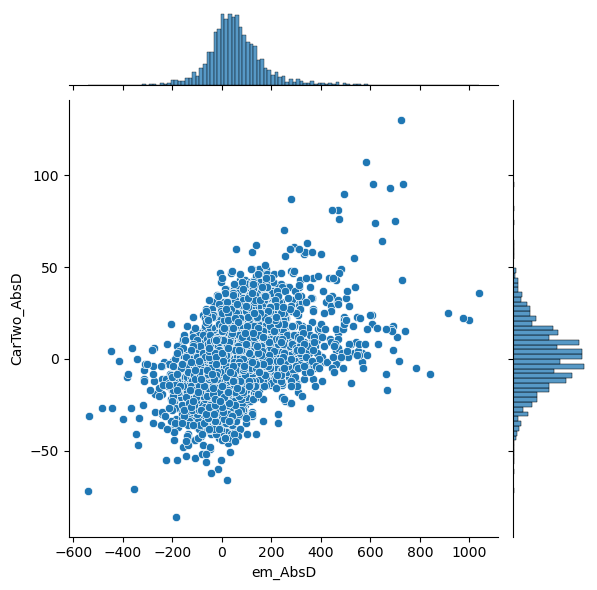

In [49]:
#correlation between the variables of badhealth and car onwership of one 
sb.jointplot(y="CarTwo_AbsD", x="em_AbsD", data=lsoa_gdf) 

In [50]:
#greater changes in general health- GOOD HEALTH 
lsoa_gdf['HealthG_AbsD']=lsoa_gdf['HealthGood21']-lsoa_gdf['HealthGood11_m21']
lsoa_gdf['HealthG_PerD']=100*lsoa_gdf['HealthG_AbsD']/lsoa_gdf['HealthGood11_m21'].abs()

In [51]:
#what about health g and two car 
lsoa_gdf['CarsTwo_AbsD']=lsoa_gdf['CarsTwo21']-lsoa_gdf['CarsTwo11_m21']
lsoa_gdf['CarsTwo_PerD']=100*lsoa_gdf['CarsTwo_AbsD']/lsoa_gdf['CarsTwo11_m21'].abs()

In [52]:
#greater changes in general health- GOOD HEALTH 
lsoa_gdf['HealthB_AbsD']=lsoa_gdf['HealthBad21']-lsoa_gdf['HealthBad11_m21']
lsoa_gdf['HealthB_PerD']=100*lsoa_gdf['HealthB_AbsD']/lsoa_gdf['HealthBad11_m21'].abs()

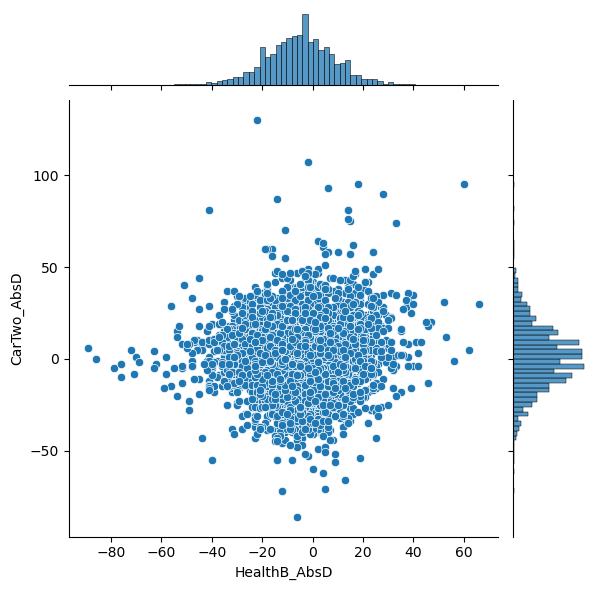

In [53]:
#correlation between the variables of badhealth and car onwership of one 
sb.jointplot(y="CarTwo_AbsD", x="HealthB_AbsD", data=lsoa_gdf) 

In [54]:
#simple OLS regression 
CarOne_HealthG_AbsD_mod = smf.ols("CarTwo_AbsD ~ HealthB_AbsD ", data = lsoa_gdf) 
CarOne_HealthG_AbsD_mod_fit = CarOne_HealthG_AbsD_mod.fit()
print(CarOne_HealthG_AbsD_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            CarTwo_AbsD   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.92
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.35e-05
Time:                        22:25:09   Log-Likelihood:                -20119.
No. Observations:                4681   AIC:                         4.024e+04
Df Residuals:                    4679   BIC:                         4.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9879      0.275      3.586   

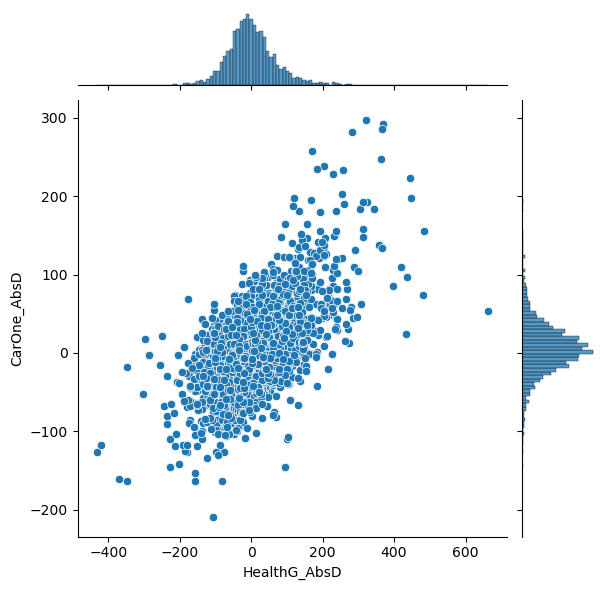

In [55]:
#correlation between the variables of good health and car onwership of one 
sb.jointplot(y="CarOne_AbsD", x="HealthG_AbsD", data=lsoa_gdf) 

In [56]:
# correlation metric 
print(ss.pearsonr(lsoa_gdf['CarOne_AbsD'].dropna(), lsoa_gdf['HealthG_AbsD'].dropna()))

PearsonRResult(statistic=0.5639417093972708, pvalue=0.0)


In [57]:
#simple OLS regression 
CarOne_HealthG_AbsD_mod = smf.ols("CarOne_AbsD ~ HealthG_AbsD ", data = lsoa_gdf) 
CarOne_HealthG_AbsD_mod_fit = CarOne_HealthG_AbsD_mod.fit()
print(CarOne_HealthG_AbsD_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            CarOne_AbsD   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2182.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:25:10   Log-Likelihood:                -22929.
No. Observations:                4681   AIC:                         4.586e+04
Df Residuals:                    4679   BIC:                         4.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6632      0.475     11.929   

In [58]:
#spatial lag on univariate cars one 
variable_name= ['CarsOne21']
Dlagm = spreg.ML_Lag(lsoa_gdf[['HealthGood21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='Car One',
name_x=variable_name)
print(Dlagm.summary)

NameError: name 'wKNN8' is not defined

In [59]:
#other variables in the change of car ownership of one- Economic status as EMPLOYED
lsoa_gdf['Employed_AbsD']=lsoa_gdf['EconEm21']-lsoa_gdf['EconEm11_m21']
lsoa_gdf['Employed_PerD']=100*lsoa_gdf['Employed_AbsD']/lsoa_gdf['EconEm11_m21'].abs()

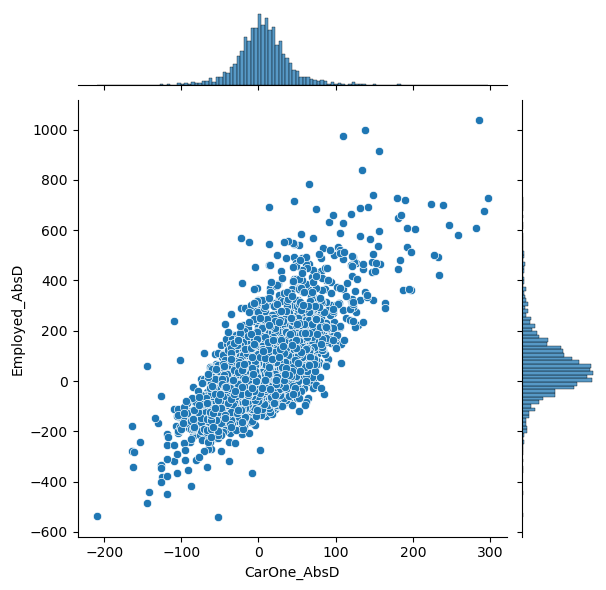

In [60]:
sb.jointplot(x="CarOne_AbsD", y="Employed_AbsD", data=lsoa_gdf) 

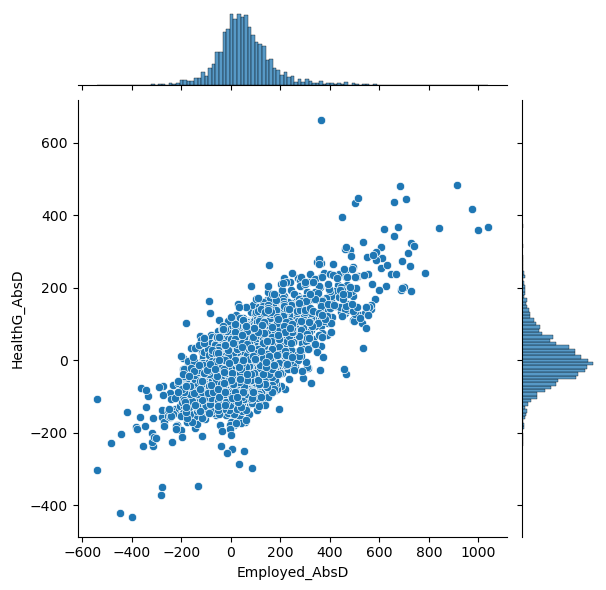

In [61]:
#EMPLOYED AND HEALTH GOOD 
sb.jointplot(x="Employed_AbsD", y="HealthG_AbsD", data=lsoa_gdf) 

In [62]:
#does these correlations change when look into by 'unemployed' 
lsoa_gdf['Umployed_AbsD']=lsoa_gdf['EconUn21']-lsoa_gdf['EconUn11_m21']
lsoa_gdf['Umployed_PerD']=100*lsoa_gdf['Umployed_AbsD']/lsoa_gdf['EconUn11_m21'].abs()

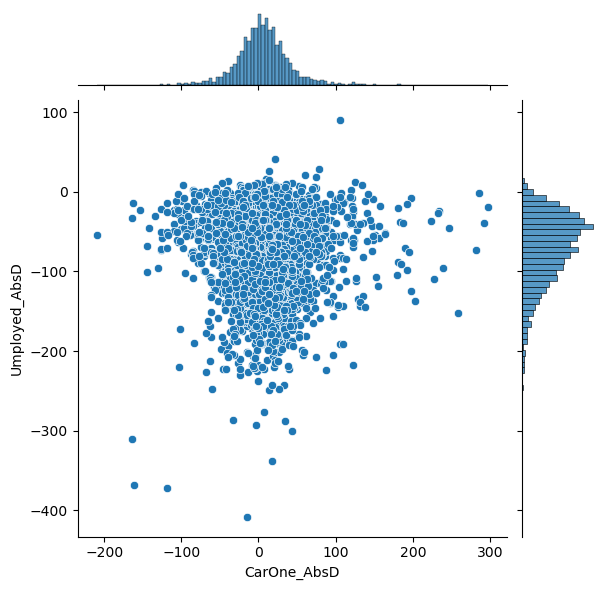

In [63]:
#Car ownership of one and unemployed 
sb.jointplot(x="CarOne_AbsD", y="Umployed_AbsD", data=lsoa_gdf) 

In [64]:
#simple OLS regression- car one and unemployed 
CarOne_HealthG_AbsD_mod = smf.ols("CarOne_AbsD ~ Umployed_AbsD ", data = lsoa_gdf) 
CarOne_HealthG_AbsD_mod_fit = CarOne_HealthG_AbsD_mod.fit()
print(CarOne_HealthG_AbsD_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            CarOne_AbsD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4744
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.491
Time:                        22:25:13   Log-Likelihood:                -23825.
No. Observations:                4681   AIC:                         4.765e+04
Df Residuals:                    4679   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0907      1.059      5.749

In [65]:
#what about health g and two car 
#does these correlations change when look into by 'unemployed' 
lsoa_gdf['CarsTwo_AbsD']=lsoa_gdf['CarsTwo21']-lsoa_gdf['CarsTwo11_m21']
lsoa_gdf['CarsTwo_PerD']=100*lsoa_gdf['CarsTwo_AbsD']/lsoa_gdf['CarsTwo11_m21'].abs()

In [66]:
# correlation metric 
print(ss.pearsonr(lsoa_gdf['CarsTwo_AbsD'].dropna(), lsoa_gdf['HealthG_AbsD'].dropna()))

PearsonRResult(statistic=0.3196107242800389, pvalue=1.203700059860469e-111)


In [67]:
#simple OLS regression- car one and unemployed 
CarOne_HealthG_AbsD_mod = smf.ols("CarsTwo_AbsD ~ HealthG_AbsD ", data = lsoa_gdf) 
CarOne_HealthG_AbsD_mod_fit = CarOne_HealthG_AbsD_mod.fit()
print(CarOne_HealthG_AbsD_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           CarsTwo_AbsD   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     532.3
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.20e-111
Time:                        22:25:14   Log-Likelihood:                -19876.
No. Observations:                4681   AIC:                         3.976e+04
Df Residuals:                    4679   BIC:                         3.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3377      0.247      1.365   

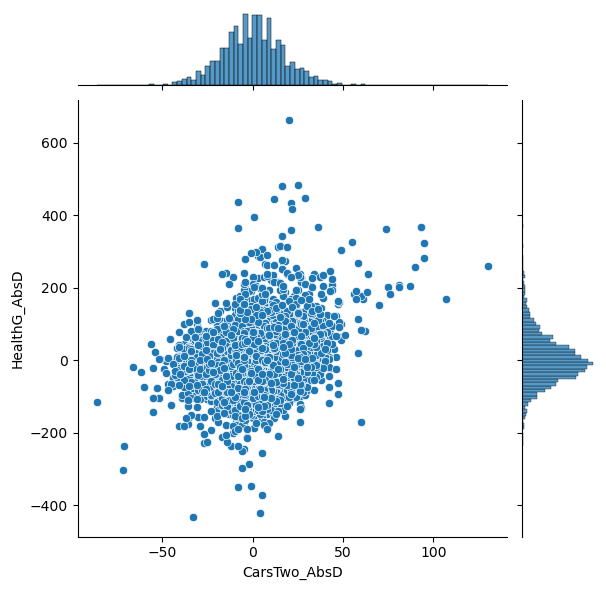

In [68]:
#Car ownership of one and unemployed 
sb.jointplot(x="CarsTwo_AbsD", y="HealthG_AbsD", data=lsoa_gdf) 

In [69]:
#standardising the variables 
lsoa_gdf['CarOne21_propT']=lsoa_gdf['CarsOne21']/lsoa_gdf['TotRes21']
lsoa_gdf['CarOne11_propT']=lsoa_gdf['CarsOne11_m21']/lsoa_gdf['TotRes11_m21']
lsoa_gdf['HealthG21_propT']=lsoa_gdf['HealthGood21']/lsoa_gdf['TotRes21']
lsoa_gdf['HealthG11_propT']=lsoa_gdf['HealthGood11_m21']/lsoa_gdf['TotRes11_m21']

In [70]:
#usign the standardised variables for modelling 
lsoa_gdf['CarOne_propT_AbsD']=lsoa_gdf['CarOne21_propT']-lsoa_gdf['CarOne11_propT']
lsoa_gdf['HealthG_propT_AbsD']=lsoa_gdf['HealthG21_propT']-lsoa_gdf['HealthG11_propT']

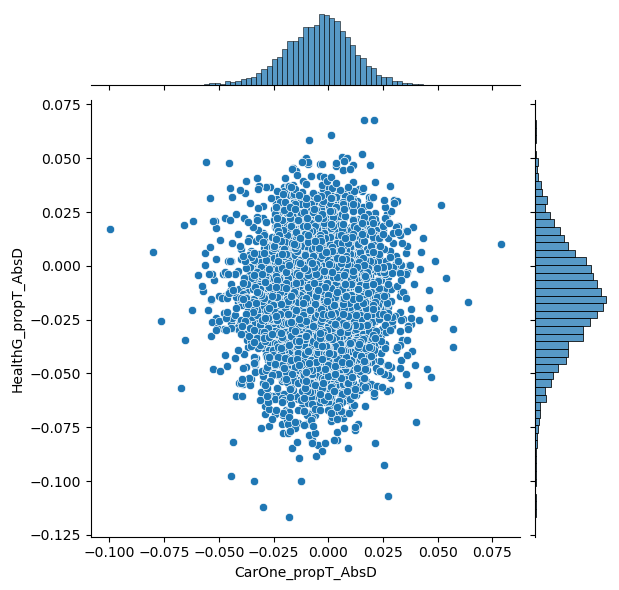

In [71]:
sb.jointplot(x='CarOne_propT_AbsD', y="HealthG_propT_AbsD", data=lsoa_gdf) 

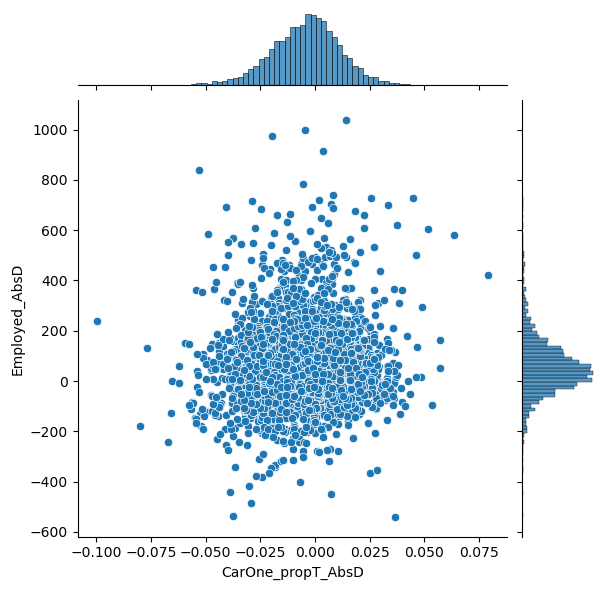

In [72]:
sb.jointplot(x='CarOne_propT_AbsD', y='Employed_AbsD', data=lsoa_gdf) 

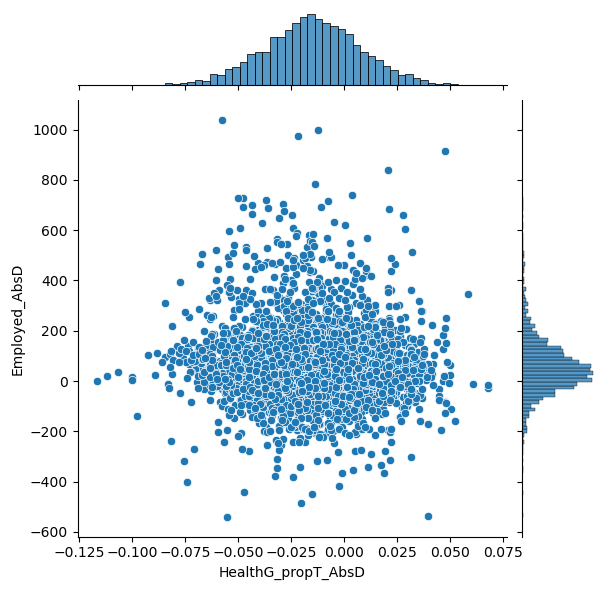

In [73]:
sb.jointplot(x='HealthG_propT_AbsD', y='Employed_AbsD', data=lsoa_gdf) 

In [74]:
CarOne_HealthG_propT_AbsD_mod = smf.ols("CarOne_propT_AbsD ~ HealthG_propT_AbsD", data = lsoa_gdf) 
CarOne_HealthG_propT_AbsD_mod_fit = CarOne_HealthG_propT_AbsD_mod.fit()
print(CarOne_HealthG_propT_AbsD_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:      CarOne_propT_AbsD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4742
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.491
Time:                        22:25:16   Log-Likelihood:                 12702.
No. Observations:                4681   AIC:                        -2.540e+04
Df Residuals:                    4679   BIC:                        -2.539e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0042      0

In [75]:
#modelling employed 
lsoa_gdf['Employed21_propT']=lsoa_gdf['EconEm21']/(lsoa_gdf['AgeAdult21']+lsoa_gdf['AgeSenior21'])
lsoa_gdf['Employed11_propT']=lsoa_gdf['EconEm11_m21']/(lsoa_gdf['AgeAdult11_m21']+lsoa_gdf['AgeSenior11_m21'])

In [76]:
lsoa_gdf['Employed_propT_AbsD']=lsoa_gdf['Employed21_propT']-lsoa_gdf['Employed11_propT']

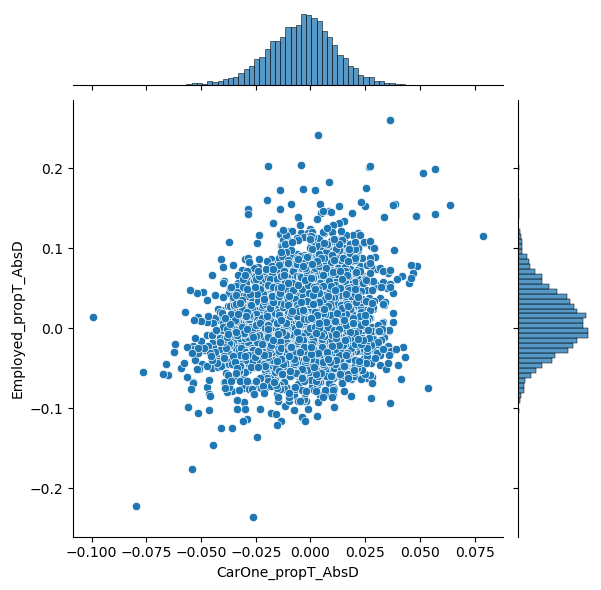

In [77]:
sb.jointplot(x='CarOne_propT_AbsD', y="Employed_propT_AbsD", data=lsoa_gdf) 

In [78]:
Child_QualUni_propT_AbsD_mod = smf.ols("CarOne_propT_AbsD ~ HealthG_propT_AbsD", data = lsoa_gdf) 
Child_QualUni_propT_AbsD_mod_fit = Child_QualUni_propT_AbsD_mod.fit()
print(Child_QualUni_propT_AbsD_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:      CarOne_propT_AbsD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4742
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.491
Time:                        22:25:17   Log-Likelihood:                 12702.
No. Observations:                4681   AIC:                        -2.540e+04
Df Residuals:                    4679   BIC:                        -2.539e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0042      0

Text(0.5, 0, 'Residuals')

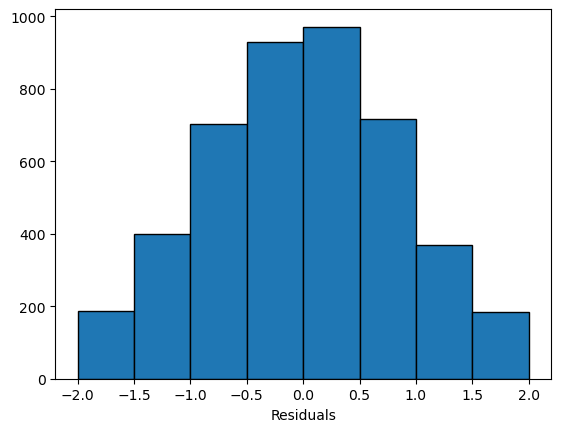

In [79]:
plt.hist(CarOne_HealthG_AbsD_mod_fit.resid_pearson, 
         edgecolor='black',
         bins=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
plt.xlabel('Residuals')

Text(0, 0.5, 'Standardized Residuals (z)')

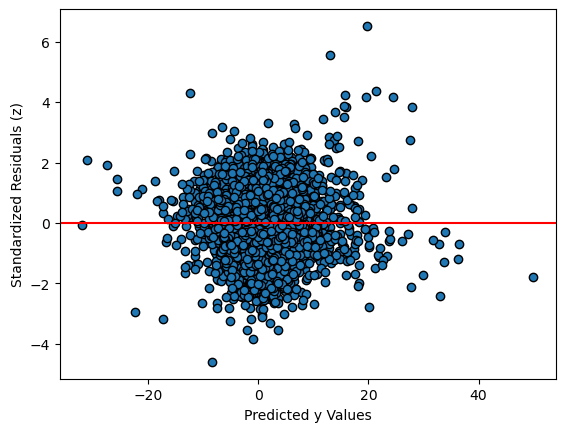

In [80]:
plt.plot(CarOne_HealthG_AbsD_mod_fit.fittedvalues, CarOne_HealthG_AbsD_mod_fit.resid_pearson,
         'oC0',  
         markeredgecolor='black')
plt.axhline(c = 'red')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')  

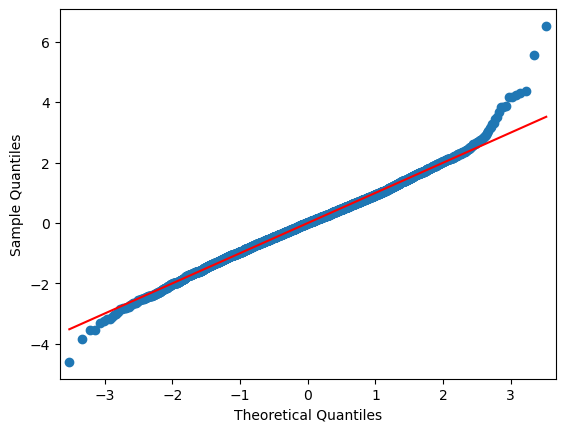

In [81]:
qqfig = sm.qqplot(CarOne_HealthG_AbsD_mod_fit.resid_pearson, line='r')

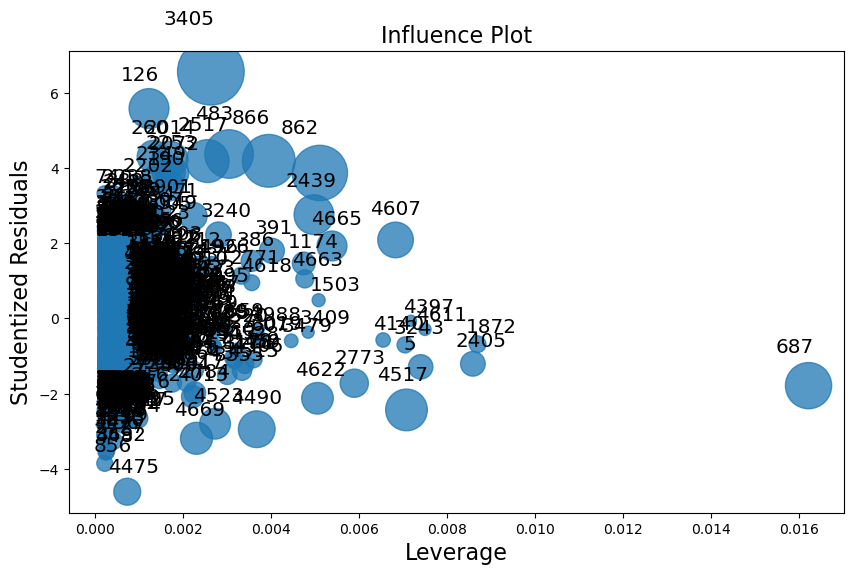

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(CarOne_HealthG_AbsD_mod_fit, alpha=0.05, 
                                 criterion="cooks", ax=ax)

In [83]:
#variables for pm 25 expsosure 
lsoa_gdf['pm_AbsD']=lsoa_gdf['PM25-2019-max']-lsoa_gdf['PM25-2013-min']
lsoa_gdf['pm_PerD']=100*lsoa_gdf['pm_AbsD']/lsoa_gdf['PM25-2013-min'].abs()

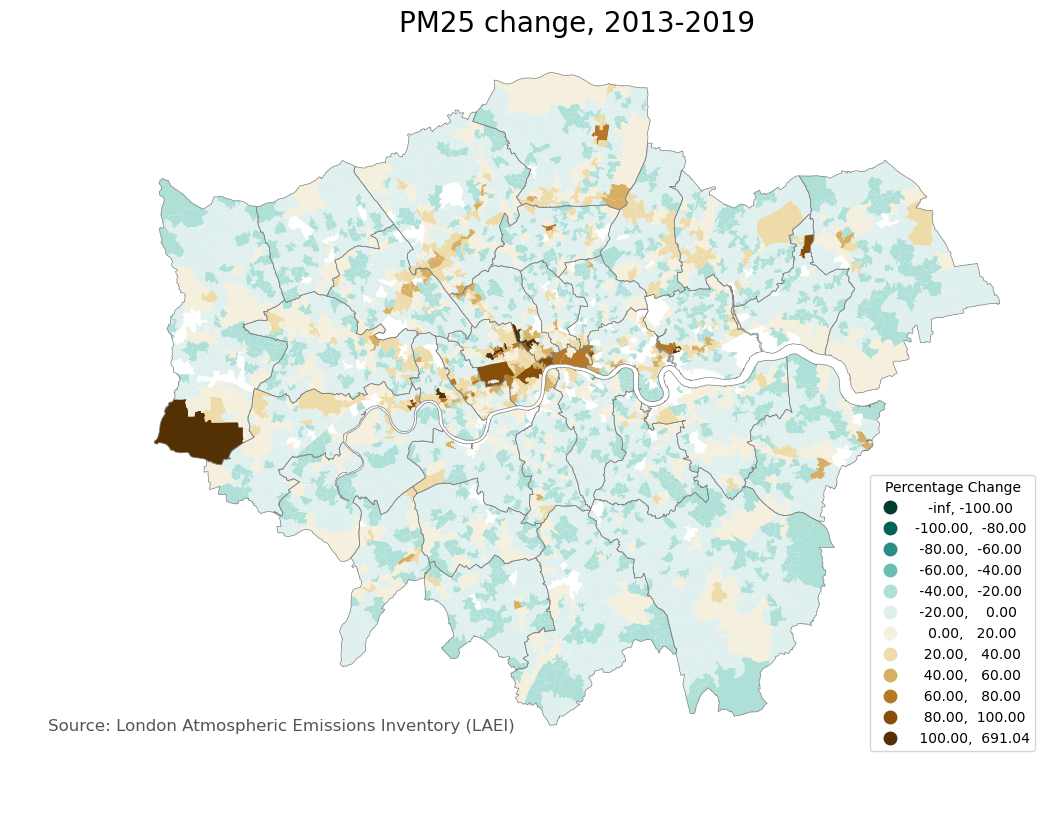

In [84]:
#code to make LSOAs with splits grey
cbins = [x for x in range(-100, 120, 20)]  #from https://stackoverflow.com/a/7267287
fig, ax1 = plt.subplots(1, figsize=(12, 10))  


lsoa_gdf.plot(column='pm_PerD', ax=ax1,
             scheme='UserDefined',
             classification_kwds={'bins': cbins}, 
             cmap ='BrBG_r'
              
              ,
             edgecolor='grey', linewidth=0.0,        
             legend=True, 
             legend_kwds={
                 'title': "Percentage Change",
                 'loc': 'lower right'},
             missing_kwds={
                 "color": "lightgrey",
                 "label": "Split LSOAs"})  

borshp.plot(ax=ax1, facecolor="none", edgecolor="grey", linewidth=0.5)

ax1.axis('off') 
plt.title('PM25 change, 2013-2019', fontsize=20)  

ax1.annotate('Source: London Atmospheric Emissions Inventory (LAEI)',
             xy=(0.04, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555') 

plt.savefig("data/Map_LSOAs_PerD_11-21_noSplits.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Map_LSOAs_PerD_11-21_noSplits.svg", bbox_inches='tight', facecolor='white')

plt.show()

In [85]:
#variables for NO2 expsosure 
lsoa_gdf['no_AbsD']=lsoa_gdf['NO2-2019-max']-lsoa_gdf['NO2-2013-min']
lsoa_gdf['no_PerD']=100*lsoa_gdf['no_AbsD']/lsoa_gdf['NO2-2013-min'].abs()

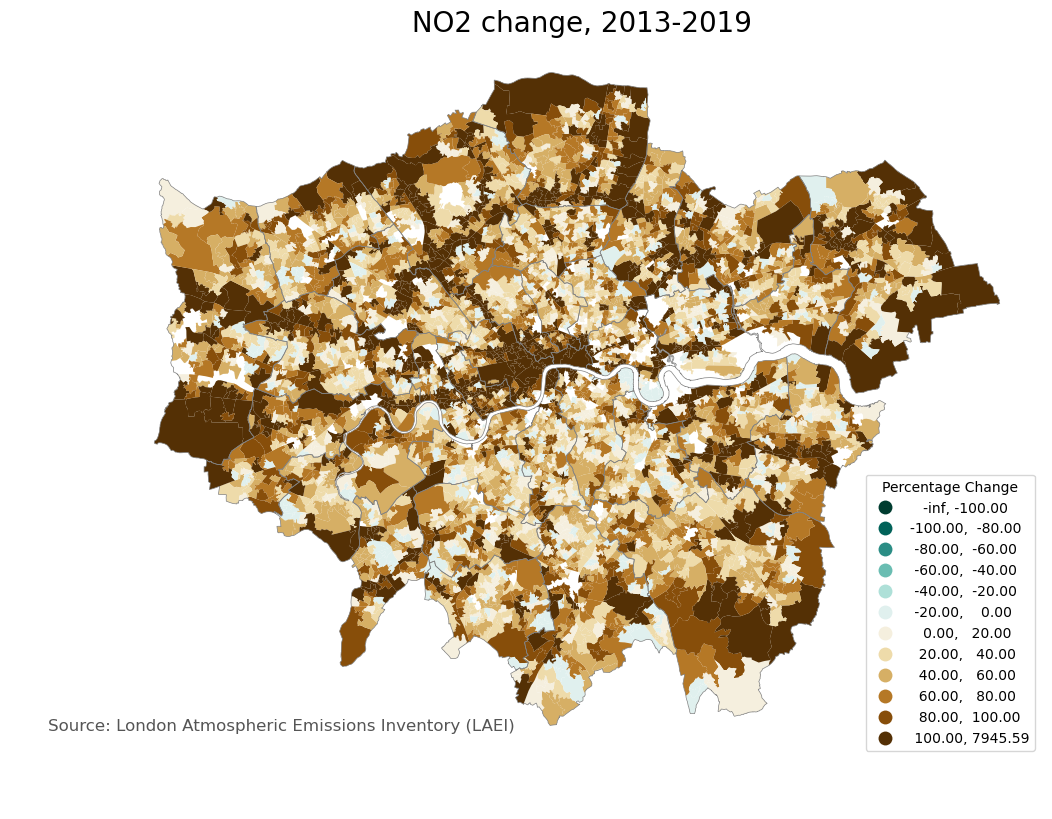

In [86]:
#code to make LSOAs with splits grey
cbins = [x for x in range(-100, 120, 20)]  #from https://stackoverflow.com/a/7267287
fig, ax1 = plt.subplots(1, figsize=(12, 10))  


lsoa_gdf.plot(column='no_PerD', ax=ax1,
             scheme='UserDefined',
             classification_kwds={'bins': cbins}, 
             cmap ='BrBG_r',
             edgecolor='grey', linewidth=0.0,        
             legend=True, 
             legend_kwds={
                 'title': "Percentage Change",
                 'loc': 'lower right'},
             missing_kwds={
                 "color": "lightgrey",
                 "label": "Split LSOAs"})  

borshp.plot(ax=ax1, facecolor="none", edgecolor="grey", linewidth=0.5)

ax1.axis('off') 
plt.title(' NO2 change, 2013-2019', fontsize=20)  

ax1.annotate('Source: London Atmospheric Emissions Inventory (LAEI)',
             xy=(0.04, 0.1), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555') 

plt.savefig("data/Map_LSOAs_PerD_11-21_noSplits.png", dpi=300, bbox_inches='tight', facecolor='white')
#plt.savefig("img/Map_LSOAs_PerD_11-21_noSplits.svg", bbox_inches='tight', facecolor='white')

plt.show()

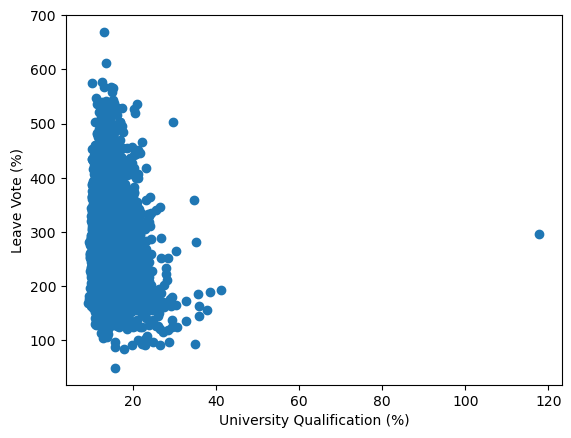

In [87]:
fig, ax = plt.subplots(1)
plt.scatter(lsoa_gdf['PM25-2019-max'],lsoa_gdf['CarsOne21'])
ax.set_ylabel('Leave Vote (%)')
ax.set_xlabel('University Qualification (%)')
plt.show()

In [88]:
#multivariate model:
independent_vars = ['CarsOne21', 'EconEm21', 'HealthVG21']
dependent_var= ['PM25-2019-mean']
X = lsoa_gdf[independent_vars]
y = lsoa_gdf[dependent_var]
X = sm.add_constant(X)
PMmodel = sm.OLS(y, X).fit()
print(PMmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         PM25-2019-mean   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     598.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:25:23   Log-Likelihood:                -4394.3
No. Observations:                4681   AIC:                             8797.
Df Residuals:                    4677   BIC:                             8822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7337      0.049    219.502      0.0

In [89]:
#multivariate model:
independent_vars = ['CarsOne21', 'EconEm21', 'HealthVG21']
dependent_var= ['PM25-2019-mean']
X = lsoa_gdf[independent_vars]
y = lsoa_gdf[dependent_var]
X = sm.add_constant(X)
PMmodel = sm.OLS(y, X).fit()
print(PMmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         PM25-2019-mean   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     598.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:25:23   Log-Likelihood:                -4394.3
No. Observations:                4681   AIC:                             8797.
Df Residuals:                    4677   BIC:                             8822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7337      0.049    219.502      0.0

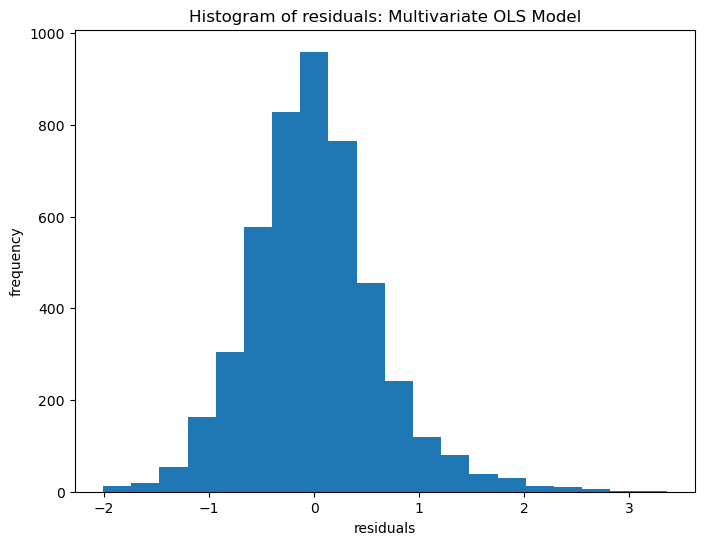

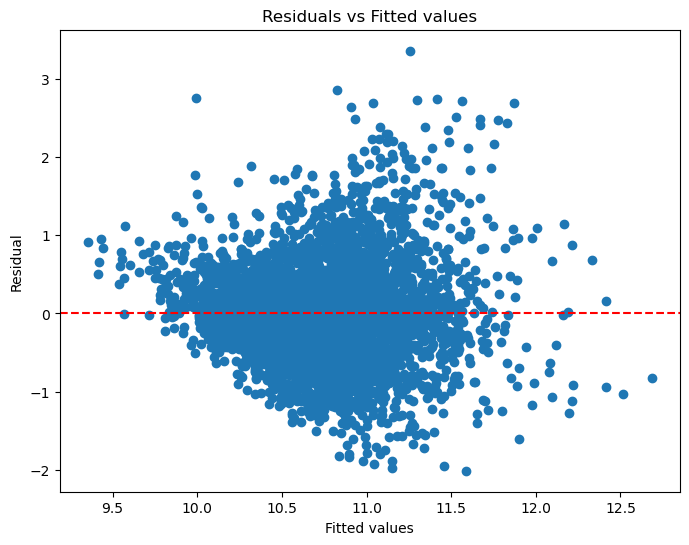

In [90]:
residuals = PMmodel.resid
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of residuals: Multivariate OLS Model')
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.figure(figsize=(8, 6))
plt.scatter(PMmodel.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle= '--')
plt.title('Residuals vs Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

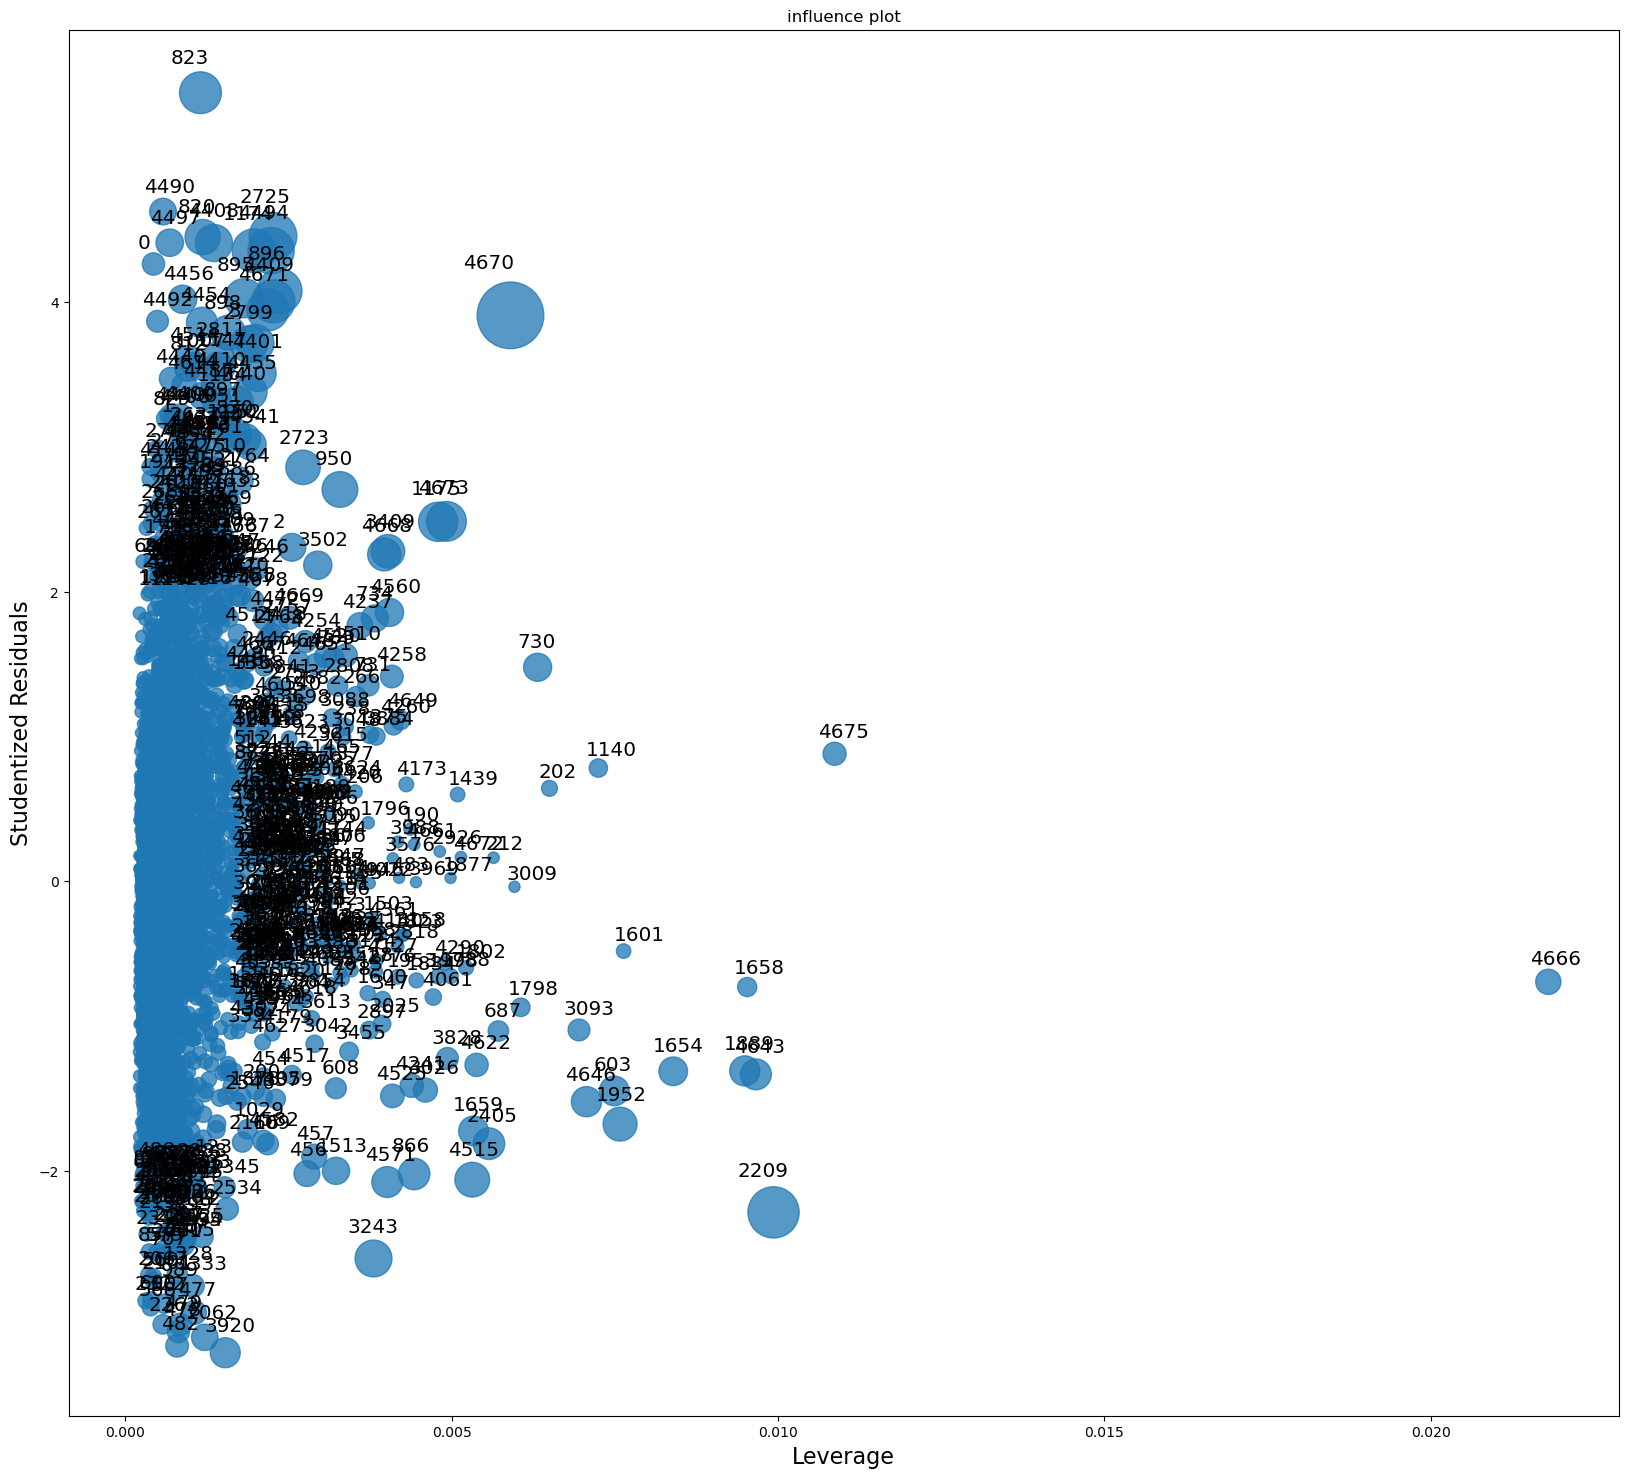

In [91]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(PMmodel)
leverage = influence.hat_matrix_diag
cooks_distance, _ =influence.cooks_distance
plt.figure(figsize=(20, 18))
sm.graphics.influence_plot(PMmodel, alpha=0.05, criterion='cooks', ax=plt.gca())
plt.title('influence plot')
plt.show()


In [92]:
wKNN8 = weights.KNN.from_dataframe(lsoa_gdf, k=8)
wKNN8.transform = 'r'

In [93]:
moran = esda.moran.Moran(lsoa_gdf['NO2-2019-mean'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.899
0.001


In [94]:
moran = esda.moran.Moran(lsoa_gdf['NO2-2013-mean'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.843
0.001


In [95]:
moran = esda.moran.Moran(lsoa_gdf['PM25-2019-mean'], wKNN8)
print(round(moran.I,3))

print(round(moran.p_sim,3))

0.909
0.001


In [96]:
moran = esda.moran.Moran(lsoa_gdf['PM25-2013-mean'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.924
0.001


In [97]:
#morans for the multivariate model
resid_moran = esda.moran.Moran(PMmodel.resid_pearson,
wKNN8)
print(round(resid_moran.I,3))
print(round(resid_moran.p_sim,3))


0.744
0.001


univariate model for car one 
variable_names = ['CarsOne21']
MU1 = spreg.OLS(
lsoa_gdf[['PM25-2019-mean']].values,

lsoa_gdf[variable_names].values,
name_y='PM25-2019-min',
name_x=variable_names)
print(MU1.summary)


In [98]:
variable_names = ['CarsTwo21']
MU1 = spreg.OLS(
lsoa_gdf[['NO2-2019-mean']].values,
lsoa_gdf[variable_names].values,
name_y='PM25-2019-mean',
name_x=variable_names)
print(MU1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :PM25-2019-mean                Number of Observations:        4681
Mean dependent var  :     28.1215                Number of Variables   :           2
S.D. dependent var  :      4.3495                Degrees of Freedom    :        4679
R-squared           :      0.5367
Adjusted R-squared  :      0.5366
Sum squared residual:     41019.7                F-statistic           :   5420.1667
Sigma-square        :       8.767                Prob(F-statistic)     :           0
S.E. of regression  :       2.961                Log likelihood        :  -11722.199
Sigma-square ML     :       8.763                Akaike info criterion :   23448.398
S.E of regression ML:      2.9602                Schwarz criterion     :   23461.301

----------------------------------------------------------

In [99]:
#spatial lag on univariate cars one 
variable_name= ['CarsTwo21']
Dlagm = spreg.ML_Lag(lsoa_gdf[['HealthBad21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='HealthBad21',
name_x=variable_name)
print(Dlagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : HealthBad21                Number of Observations:        4681
Mean dependent var  :     57.8656                Number of Variables   :           3
S.D. dependent var  :     23.4919                Degrees of Freedom    :        4678
Pseudo R-squared    :      0.2808
Spatial Pseudo R-squared:  0.0234
Log likelihood      : -20822.9192
Sigma-square ML     :    405.0148                Akaike info criterion :   41651.838
S.E of regression   :     20.1250                Schwarz criterion     :   41671.192

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [100]:
#spatial lag on univariate cars one 
variable_name= ['CarsZero21']
Dlagm = spreg.ML_Lag(lsoa_gdf[['PM25-2019-mean']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='HealthBad21',
name_x=variable_name)
print(Dlagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : HealthBad21                Number of Observations:        4681
Mean dependent var  :     10.7445                Number of Variables   :           3
S.D. dependent var  :      0.7279                Degrees of Freedom    :        4678
Pseudo R-squared    :      0.9320
Spatial Pseudo R-squared:  0.7203
Log likelihood      :    725.8108
Sigma-square ML     :      0.0363                Akaike info criterion :   -1445.622
S.E of regression   :      0.1905                Schwarz criterion     :   -1426.268

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [101]:
#spatial lag on univariate cars one 
variable_name= ['NO2-2019-mean']
Dlagm = spreg.ML_Lag(lsoa_gdf[['CarsOne21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='PM25-2019-mean',
name_x=variable_name)
print(Dlagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PM25-2019-mean                Number of Observations:        4681
Mean dependent var  :    280.2258                Number of Variables   :           3
S.D. dependent var  :     73.3406                Degrees of Freedom    :        4678
Pseudo R-squared    :      0.3785
Spatial Pseudo R-squared:  0.1339
Log likelihood      : -25825.7972
Sigma-square ML     :   3398.5157                Akaike info criterion :   51657.594
S.E of regression   :     58.2968                Schwarz criterion     :   51676.948

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------------

In [101]:
#spatial lag on univariate cars one 
variable_name= ['NO2-2019-mean']
Dlagm = spreg.ML_Lag(lsoa_gdf[['CarsTwo21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='PM25-2019-mean',
name_x=variable_name)
print(Dlagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PM25-2019-mean                Number of Observations:        4681
Mean dependent var  :     96.5984                Number of Variables   :           3
S.D. dependent var  :     56.1946                Degrees of Freedom    :        4678
Pseudo R-squared    :      0.8117
Spatial Pseudo R-squared:  0.5683
Log likelihood      : -21887.9162
Sigma-square ML     :    599.3037                Akaike info criterion :   43781.832
S.E of regression   :     24.4807                Schwarz criterion     :   43801.186

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------------

In [ ]:
#spatial lag on univariate cars one 
variable_name= ['NO2-2019-mean']
Dlagm = spreg.ML_Lag(lsoa_gdf[['CarsTwo21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='PM25-2019-mean',
name_x=variable_name)
print(Dlagm.summary)

In [115]:
variable_names = ['CarsOne21']
MU1 = spreg.OLS(
lsoa_gdf[['HealthBad21']].values,
lsoa_gdf[variable_names].values,
name_y='healthgood',
name_x=variable_names)
print(MU1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :  healthgood                Number of Observations:        4681
Mean dependent var  :     57.8656                Number of Variables   :           2
S.D. dependent var  :     23.4919                Degrees of Freedom    :        4679
R-squared           :      0.0003
Adjusted R-squared  :      0.0001
Sum squared residual: 2.58199e+06                F-statistic           :      1.3869
Sigma-square        :     551.825                Prob(F-statistic)     :       0.239
S.E. of regression  :      23.491                Log likelihood        :  -21417.168
Sigma-square ML     :     551.589                Akaike info criterion :   42838.336
S.E of regression ML:     23.4859                Schwarz criterion     :   42851.239

------------------------------------------------------------

In [105]:
variable_names = ['CarsTwo21']
MU1 = spreg.OLS(
lsoa_gdf[['HealthBad21']].values,
lsoa_gdf[variable_names].values,
name_y='healthgood',
name_x=variable_names)
print(MU1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :  healthgood                Number of Observations:        4681
Mean dependent var  :     57.8656                Number of Variables   :           2
S.D. dependent var  :     23.4919                Degrees of Freedom    :        4679
R-squared           :      0.0318
Adjusted R-squared  :      0.0316
Sum squared residual: 2.50059e+06                F-statistic           :    153.7511
Sigma-square        :     534.427                Prob(F-statistic)     :   9.182e-35
S.E. of regression  :      23.118                Log likelihood        :  -21342.190
Sigma-square ML     :     534.199                Akaike info criterion :   42688.380
S.E of regression ML:     23.1127                Schwarz criterion     :   42701.282

------------------------------------------------------------

In [106]:
#spatial lag on univariate cars one 
variable_name= ['CarsTwo21']
Dlagm = spreg.ML_Lag(lsoa_gdf[['HealthGood21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='PM25-2019-mean',
name_x=variable_name)
print(Dlagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PM25-2019-mean                Number of Observations:        4681
Mean dependent var  :    565.6973                Number of Variables   :           3
S.D. dependent var  :    120.7064                Degrees of Freedom    :        4678
Pseudo R-squared    :      0.3614
Spatial Pseudo R-squared:  0.0361
Log likelihood      : -28240.7534
Sigma-square ML     :   9507.3959                Akaike info criterion :   56487.507
S.E of regression   :     97.5059                Schwarz criterion     :   56506.861

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------------

In [164]:
#spatial error for univariate car one 
variable_name=['CarsOne21']
Derrm = spreg.ML_Error(lsoa_gdf[['HealthGood21']].values,
lsoa_gdf[variable_name].values,
w=wKNN8,
name_y='healthgood',
name_x=variable_name)
print(Derrm.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  healthgood                Number of Observations:        4681
Mean dependent var  :    565.6973                Number of Variables   :           2
S.D. dependent var  :    120.7064                Degrees of Freedom    :        4679
Pseudo R-squared    :      0.1696
Log likelihood      : -27167.1285
Sigma-square ML     :   5741.0119                Akaike info criterion :   54338.257
S.E of regression   :     75.7695                Schwarz criterion     :   54351.159

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       270.09938    

In [108]:
independent_var = ['NO2-2019-max']
dependent_var= ['CarsOne21']
X = lsoa_gdf[independent_var]
y = lsoa_gdf[dependent_var]
X = sm.add_constant(X)
Dmodel = sm.OLS(y, X).fit()
print(Dmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              CarsOne21   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.24
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.01e-06
Time:                        22:15:42   Log-Likelihood:                -26737.
No. Observations:                4681   AIC:                         5.348e+04
Df Residuals:                    4679   BIC:                         5.349e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          286.6167      1.778    161.167   

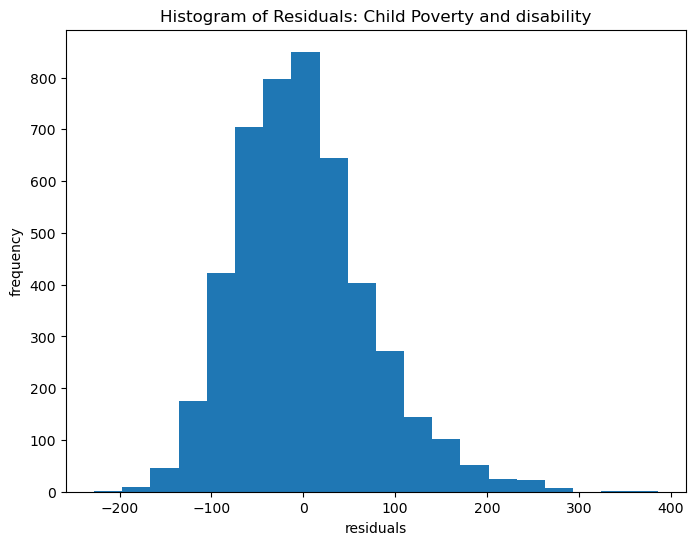

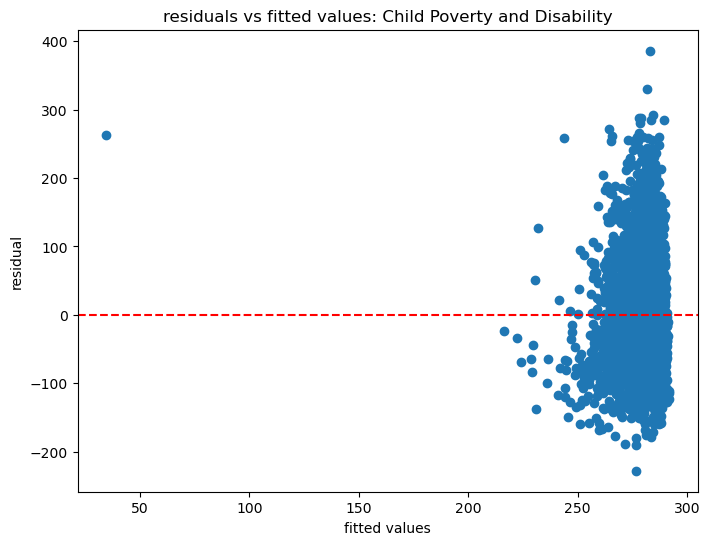

In [303]:
residuals = Dmodel.resid
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals: Child Poverty and disability')
9
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(Dmodel.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle= '--')
plt.title('residuals vs fitted values: Child Poverty and Disability')
plt.xlabel('fitted values')
plt.ylabel('residual')
plt.show()